In [145]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fft import fft
#from scipy.fftpack import fft

<h2> Task 1 </h2>

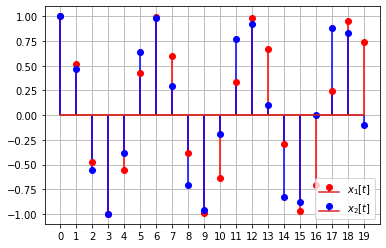

In [146]:
A1 = A2 = 1 #Amplitud
f1 = 21 #Hz
f2 = 22 #Hz
fs = 128 #Hz (sampling freq)

Ts = 1/fs # sampling time

w1 = 2*np.pi*f1
w2 = 2*np.pi*f2

K = 20

start = 0
stop = (K)*Ts
step = Ts   
t = np.arange(start, stop, step)

x1 = A1*np.cos(w1*t)
x2 = A2*np.cos(w2*t)

t2 = np.arange(start, K)

fig, ax = plt.subplots()

ax.stem(t2, x1, markerfmt='ro', linefmt="r", label = "$x_1[t]$")#, color='r')
ax.stem(t2, x2, markerfmt='bo', linefmt="b", label = "$x_2[t]$")#, color='g')
ax.set_xticks(t2)
ax.set_xlabel("t (seconds)")
ax.set_ylabel("$x_1[t]$, $x_2[t]$")
ax.grid()
ax.legend()

fig.savefig("./Images/1b")

<h2> Task 2a & 2b </h2> 


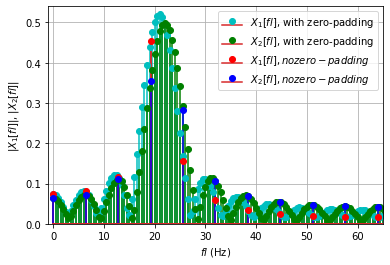

In [147]:
L = K           #20
scale_factor = 1/K

fl = np.arange(0, L)/L*fs

fig, a = plt.subplots()

# Task 2b

L2 = 256
fl2 = np.arange(0, L2)/L2*fs

X1b = fft(x1, L2)   #DFT
X2b = fft(x2, L2)   #DFT
X1b = X1b*scale_factor
X2b = X2b*scale_factor
X1b_mag = np.abs(X1b)
X2b_mag = np.abs(X2b)

a.stem(fl2, X1b_mag, markerfmt='co', linefmt="c", label = "$X_1[fl]$, with zero-padding")
a.stem(fl2, X2b_mag, markerfmt='go', linefmt="g", label = "$X_2[fl]$, with zero-padding")

# Task 2a
X1a = fft(x1)    #DFT
X2a = fft(x2)    #DFT
X1a = X1a*scale_factor
X2a = X2a*scale_factor
X1a_mag = np.abs(X1a)
X2a_mag = np.abs(X2a)

a.stem(fl, X1a_mag, markerfmt='ro', linefmt="r", label = "$X_1[fl], no zero-padding$")
a.stem(fl, X2a_mag, markerfmt='bo', linefmt="b", label = "$X_2[fl], no zero-padding$")
a.set_xlim(-1, fs/2+1)
a.set_ylim(0, 0.54)
a.set_xlabel("$fl$ (Hz)")
a.set_ylabel("$|X_1[fl]|$, $|X_2[fl]|$")
a.legend()
a.grid()

fig.savefig("./Images/2a")

<h2>Task 3 </h2>

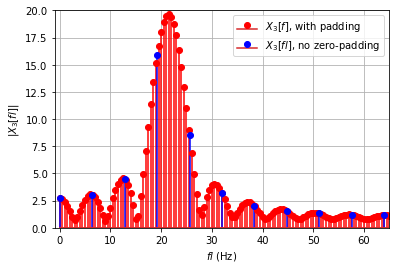

In [148]:
N = 20
x3 = x1+x2

X3 = fft(x3)
X3_padding = fft(x3, L2)

X3_mag = np.abs(X3)
X3_padding_mag = np.abs(X3_padding)

fig, b = plt.subplots()
b.stem(fl2, X3_padding_mag, markerfmt='ro', linefmt="r", label = "$X_3[f]$, with padding")
b.stem(fl, X3_mag, markerfmt='bo', linefmt="b", label= "$X_3[fl]$, no zero-padding")
b.set_xlim(-1, fs/2+1)
b.set_ylim(0, 20)
b.set_xlabel("$fl$ (Hz)")
b.set_ylabel("$|X_3[fl]|$")
b.legend()
b.grid()

fig.savefig("./Images/3")
